
# <span style="color:rgb(213,80,0)"><u>**Familiarización con MATLAB:**</u></span>
1.   La ecuación que vamos a graficar a manera de prueba es:

## $${y=t}^2$$

Aquí en una primera instancia estamos verificando que el sampling rate afecta la resolución de la gráfica:



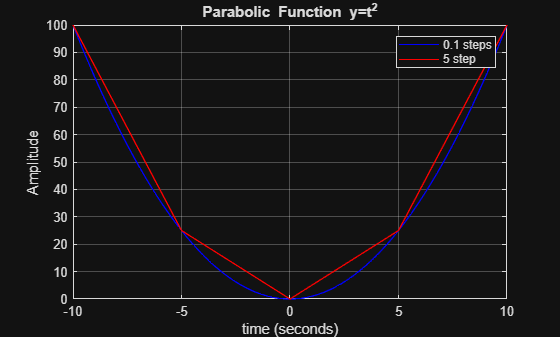

In [1]:
%%ENIA
%EXERCISE 1. INITIATION TO MATLAB
%Plot y=t^2
    t=-10:0.1:10;
    y = t.^2;
    plot(t, y, 'b');
    xlabel('time (seconds)');
    ylabel('Amplitude');
    title('Parabolic Function y=t^2');
    grid on;
    hold on;
    t=-10:5:10;
    y = t.^2;
    plot(t, y, 'r');
    legend('0.1 steps', '5 step');
    hold off;


Seguido a esto, probamos graficar funciones trigonométricas:



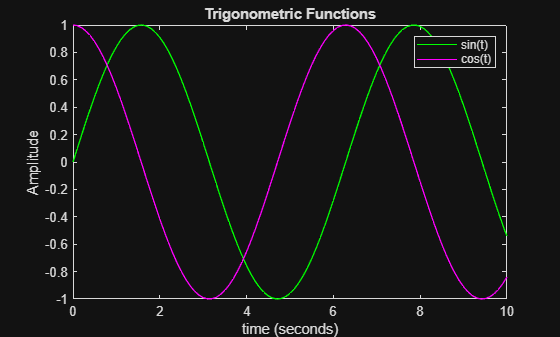

In [2]:
clear;clc;
    %plot trigonometric functions
    t = 0:0.1:10;
    y1 = sin(t);
    y2 = cos(t);
    plot(t, y1, 'g', t, y2, 'm');
    xlabel('time (seconds)');
    ylabel('Amplitude');
    title('Trigonometric Functions');
    legend('sin(t)', 'cos(t)');


Ahora, continuemos con la generación de dos figuras de conjunta:



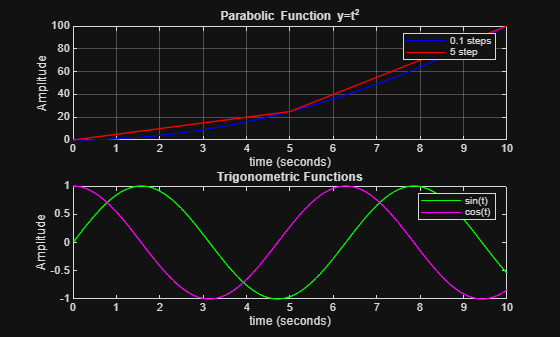

In [3]:
clear;clc;
    %Plot two plots SEPARATELY
        t=0:0.1:10;
        y = t.^2;
        figure(1);
        subplot(2,1,1);
        plot(t, y, 'b');
        xlabel('time (seconds)');
        ylabel('Amplitude');
        title('Parabolic Function y=t^2');
        grid on;
        hold on;
        t=0:5:10;
        y = t.^2;
        plot(t, y, 'r');
        legend('0.1 steps', '5 step');
    % %plot trigonometric functions
        t = 0:0.1:10;
        y1 = sin(t);
        y2 = cos(t);
        subplot(2,1,2);
        plot(t, y1, 'g', t, y2, 'm');
        xlabel('time (seconds)');
        ylabel('Amplitude');
        title('Trigonometric Functions');
        legend('sin(t)', 'cos(t)');

# <span style="color:rgb(213,80,0)"><u>**Ecuaciones mecánicas para el péndulo**</u></span>

2. Ahora pasemos al ejercicio del **péndulo**, visto en clase.


Primero, analicemos el ángulo con respecto al tiempo, dadas unas condiciones iniciales:


In [4]:
clear all; clc;
        %EXERCISE 2. COMPUTE AND PLOT THE VARIABLES SEEN IN CLASS
% 1a. Angle versus time
    % Define time vector and angle
    t = 0:0.001:5;
    %Parametros iniciales
    theta_0=deg2rad(15);
    theta_0_A=deg2rad(5);
    theta_dot_0=0;
    g=9.81;
    l=1;
    m=1;
    w=sqrt(g/l);
    %Ecuaciones



Las ecuaciones que analizamos en este apartado, y que encontramos en la primera clase, son:


## $$\theta =\theta {\;}_0 \cos \left(\omega \;t\right)+\frac{\overset{\cdot }{\theta {\;}_0 } }{\omega \;}\sin \left(\omega \;t\right)\;$$

## $$\overset{\cdot }{\theta \;} =$$
$$-\theta {\;}_0 \;\omega \;\sin \left(\omega \;t\right)+$$
$$\overset{\cdot }{\theta {\;}_0 } \;\cos \left(\omega \;t\right)$$

## $$\overset{\cdot \cdot }{\theta \;} =-\omega {\;}^{2\;} \theta \;$$

Y la tensión en el hilo:


## $$T=m\;l\;{\left(\overset{\cdot }{\theta \;} \right)}^2 +m\;g\;\cos \left(\theta \;\right)$$


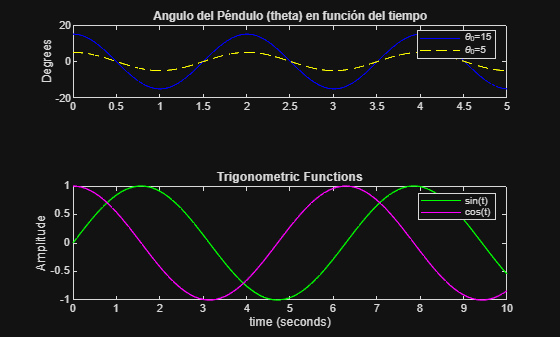

In [5]:
    %Ecuaciones
    angle = theta_0*cos(w*t)+(theta_dot_0/w)*sin(w*t);
    angle_A = theta_0_A*cos(w*t)+(theta_dot_0/w)*sin(w*t);
    angle_deg=rad2deg(angle);
    angle_deg_A=rad2deg(angle_A);
    angle_dot = -theta_0*w*sin(w*t)+theta_dot_0*cos(w*t);
    angle_dot_dot= -w^2*angle;
    T=m*l*(angle_dot).^2+m*g*cos(angle);
    figure(1);
    subplot(3,1,1);
    plot(t,angle_deg,'b');
    title('Ángulo del Péndulo (theta) en función del tiempo');
    ylabel('Degrees');
    hold on;
    plot(t,angle_deg_A,'y--');
    hold off;
    legend('\theta_0=15','\theta_0=5');


Ahora, con las mismas condiciones inciales, analicemos la primera derivada del ángulo (velocidad)


In [6]:
    subplot(3,1,2);
    plot(t,angle_dot,'r');
    ylabel('Velocity (rad/s)');
    subplot(3,1,3);



Por último, la derivada segunda de la posición (aceleración \\theta\_dot\_dot):



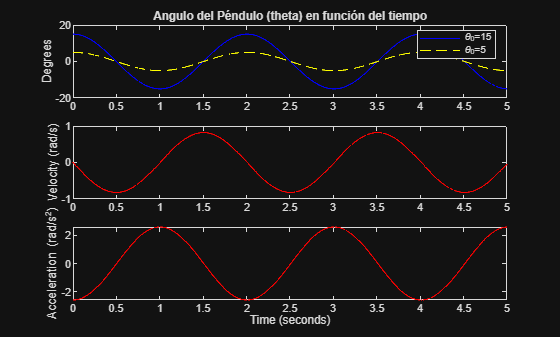

In [7]:
    plot(t,angle_dot_dot,'r');
    ylabel('Acceleration (rad/s^2)');
    xlabel('Time (seconds)');


Analicemos las energías:

-  Cinética:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$$E_K =\frac{1}{2}{\textrm{mv}}^{2\;}$$

-  Potencial:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$$E_p =\textrm{mgh}$$


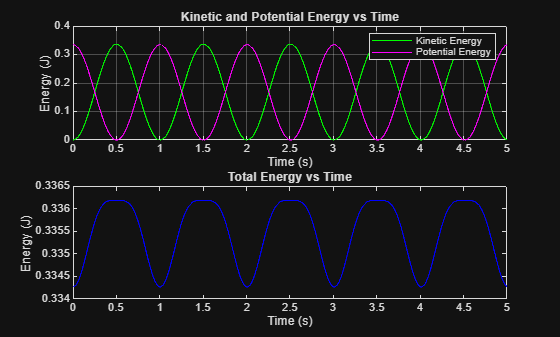

In [8]:
    v=-l*angle_dot;
    E_k = 0.5*m*v.^2; % Kinetic energy
    E_p = m * g * (l * (1 - cos(angle))); % Potential energy
    figure(2);
    subplot(2,1,1);
    plot(t, E_k, 'g', t, E_p, 'm'); % Plot kinetic and potential energy
    xlabel('Time (s)');
    ylabel('Energy (J)');
    title('Kinetic and Potential Energy vs Time');
    legend('Kinetic Energy', 'Potential Energy');
    grid on;
    hold off;
    subplot(2,1,2);
    plot(t, E_k + E_p, 'b'); % Total energy
    title('Total Energy vs Time');
    xlabel('Time (s)');
    ylabel('Energy (J)');

In [9]:
    %ylim([0 0.4])


La tensión en el hilo:



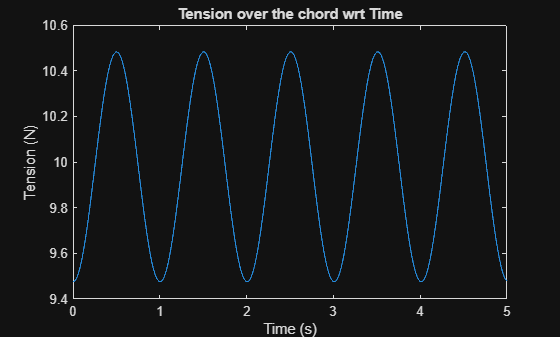

In [10]:
    figure(3);
    plot(t,T);
    title('Tension over the chord wrt Time');
    xlabel('Time (s)');
    ylabel('Tension (N)');

## <u>Utilizando ODEs' solvers</u>

Esta claro que necesitamos escribir/expresar la ecuación diferencial de orden superior a uno, como un conjunto de ecuaciones de orden 1 (primer orden). Para ello, definimos nuestra ecuación en función de la derivada más alta:


$$\overset{\cdot \cdot }{\theta \;} =-\omega {\;}^{2\;} \theta$$

generamos un vector de estado $\overset{\cdot }{y}$ en función de sus derivadas inferiores (ojo, y^2 no existe):


 $\begin{array}{l} y_1 =\theta \;\newline y_{2\;} =\overset{\cdot }{\theta \;}  \end{array}$       con derivadas     $\begin{array}{l} \overset{\cdot }{y_1 } =\overset{\cdot }{\theta \;} =y_2 \newline \overset{\cdot }{y_2 } =\overset{\cdot \cdot }{\theta \;} =-w^2 \theta \; \end{array}$


el vector es igual a:


 $\overset{\cdot }{y}$ = $\left\lbrack \begin{array}{c} y_2 \newline -w^2 \theta \; \end{array}\right\rbrack$


Perfecto. Ahora podemos usar cualquier método númerico para resolver esta ecuación.

1.  **Método de Euler (FORWARD)**

 **La expresión que gobierna este método es igual a** $y_{t+1} =y_t +h\overset{\cdot }{y}$



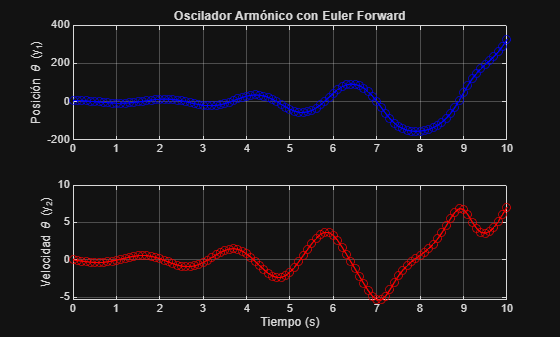

In [11]:
    clear;clc;
    h=0.1; %tamaño del paso
    % --- PARÁMETROS FÍSICOS ---
    % Define time vector and angle
    t = 0:h:10;
    N=length(t);
    %Parametros iniciales
    theta_0=deg2rad(5);
    theta_dot_0=0;
    g=9.81;
    l=1;
    m=1;
    w=sqrt(g/l);
    % --- DEFINICIÓN DE LA FUNCIÓN---
    % f recibe t y el vector y.
    % y(1) representa theta (posición)
    % y(2) representa theta_punto (velocidad)
    % La salida es el vector columna de derivadas [y2; -w^2*theta]
    f = @(t, y) [y(2); -w^2 * sin(y(1))];

    % Inicializamos la matriz de resultados
    % Tendrá 2 filas (posición y velocidad) y N columnas (pasos de tiempo)
    Y_hist = zeros(2, N);

    % --- CONDICIONES INICIALES ---
    Y_hist(:, 1) = [theta_0; theta_dot_0];

    % --- BUCLE EULER FORWARD ---
    for i = 1 : N-1
        % Extraemos el vector "actual" (columna i)
        y_actual = Y_hist(:, i);
        t_actual = t(i);

        % Aplicamos la fórmula: y_nuevo = y_actual + h * derivadas
        y_siguiente = y_actual + h * f(t_actual, y_actual);

        % Guardamos el resultado en la siguiente columna
        Y_hist(:, i+1) = y_siguiente;
    end
    % --- GRAFICAR RESULTADOS ---
    figure(4);
    subplot(2,1,1);
    plot(t, Y_hist(1, :)*(180/pi), 'b-o');
    ylabel('Posición \theta (y_1)');
    grid on;
    title('Oscilador Armónico con Euler Forward');

    subplot(2,1,2);
    plot(t, Y_hist(2, :), 'r-o');
    xlabel('Tiempo (s)');
    grid on;
    % Agregamos 'Interpreter', 'latex' y encerramos la mate en signos de dólar $$
    ylabel('Velocidad \theta (y_2)');


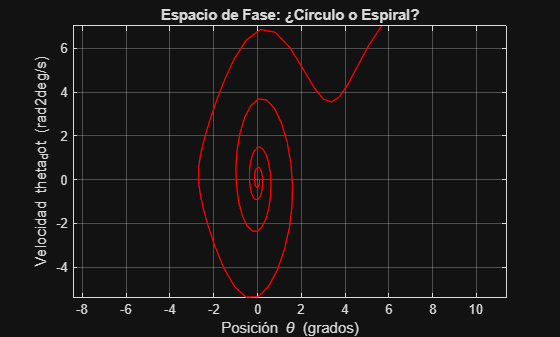

In [12]:

    figure(5);
    plot(Y_hist(1, :), Y_hist(2, :), 'r-');
    xlabel('Posición \theta (grados)');
    ylabel('Velocidad theta_dot (rad2deg/s)');
    title('Espacio de Fase: ¿Círculo o Espiral?');
    grid on; axis equal;


Ahora, miremos la solución con ODE45



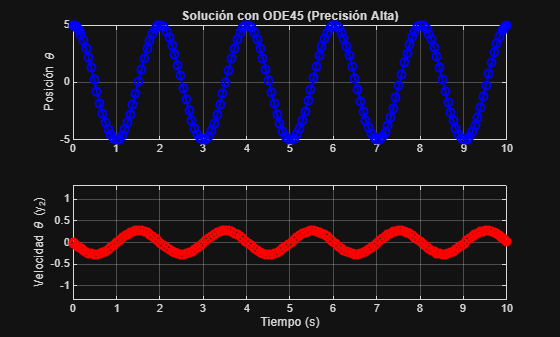

In [13]:
 clear;clc;
    h=0.1; %tamaño del paso
    % --- PARÁMETROS FÍSICOS ---
    % Define time vector and angle
    t = 0:h:10;
    t_span = [0 10];
    N=length(t);
    %Parametros iniciales
    theta_0=deg2rad(5);
    theta_dot_0=0;
    y0=[theta_0; theta_dot_0];
    g=9.81;
    l=1;
    m=1;
    w=sqrt(g/l);
    % --- DEFINICIÓN DE LA FUNCIÓN---
    % f recibe t y el vector y.
    % y(1) representa theta (posición)
    % y(2) representa theta_punto (velocidad)
    % La salida es el vector columna de derivadas [y2; -w^2*theta]
    f = @(t, y) [y(2); -w^2 * sin(y(1))];

    % --- 3. SOLUCIÓN CON ODE45 ---
    % Sintaxis: [vector_tiempo, matriz_resultados] = ode45(funcion, tiempo, condiciones)
    [t, Y] = ode45(f, t_span, y0);

    % --- GRAFICAR RESULTADOS ---
    figure(6);

    % Subplot 1: Posición vs Tiempo
    subplot(2,1,1);
    plot(t, Y(:, 1)*(180/pi), 'b-o', 'LineWidth', 1.5); % Y(:,1) es la columna de posición
    ylabel('Posición \theta'); grid on;
    title('Solución con ODE45 (Precisión Alta)');

    % Subplot 2: Espacio de Fase (Velocidad vs Posición)
    subplot(2,1,2);
    plot(t, Y(:, 2), 'r-o', 'LineWidth', 1.5);
     xlabel('Tiempo (s)');
    grid on; axis equal;
    ylabel('Velocidad \theta (y_2)');


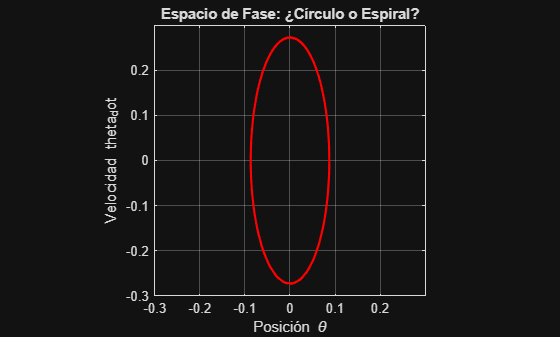

In [14]:


    figure(7);
    plot(Y(:, 1), Y(:, 2), 'r-', 'LineWidth', 1.5);
    xlabel('Posición \theta');
    ylabel('Velocidad theta_dot');
    title('Espacio de Fase: ¿Círculo o Espiral?');
    grid on;
    axis equal;
    xlim([-0.3 0.3]);
    ylim([-0.3 0.3]);


# <span style="color:rgb(213,80,0)">**Lanzamiento Parabólico (Sin Drag)**</span>

En este caso tenemos que el sistema de ecuaciones está definido por:


$$\begin{array}{l} \overset{\cdot \cdot }{x} =0\newline \overset{\cdot \cdot }{y} =-g \end{array}$$

Este es un sistema de dos ecuaciones diferenciales ordinarias de segundo orden, con unas condiciones iniciales dadas. Generamos un vector de estado $\overset{\cdot }{v}$ en función de sus derivadas inferiores:


$$v=\left\lbrack \begin{array}{c} x\newline \overset{\cdot }{x} \newline y\newline \overset{\cdot }{y}  \end{array}\right\rbrack$$

Asignamos variables intermedias:


 $\begin{array}{l} y_1 =y\newline y_{2\;} =\overset{\cdot }{y\;}  \end{array}$       con derivadas     $\begin{array}{l} \overset{\cdot }{y_1 } =\overset{\cdot }{y\;} =y_2 \newline \overset{\cdot }{y_2 } =\overset{\cdot \cdot }{y\;} =-g \end{array}$


 $\begin{array}{l} x_{1\;} =x\newline x_{2\;} =\overset{\cdot }{x\;}  \end{array}$       con derivadas     $\begin{array}{l} \overset{\cdot }{x_1 } =\overset{\cdot }{x\;} =x_2 \newline \overset{\cdot }{x_2 } =\overset{\cdot \cdot }{x\;} =0 \end{array}$


el vector $\overset{\cdot }{v}$ es igual a:


 $\overset{\cdot }{v}$ = $\left\lbrack \begin{array}{c} \overset{\cdot }{x\;} \newline 0\newline \overset{\cdot }{y\;} \newline -g \end{array}\right\rbrack$


Perfecto. Ahora, y de nuevo, podemos usar cualquier método númerico para resolver esta ecuación.



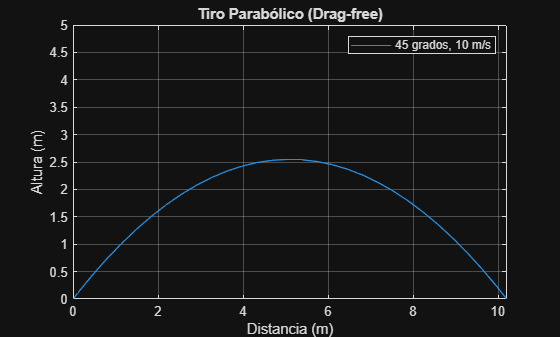

In [15]:
     clear;clc;
     h=0.1; %tamaño del paso
     % --- PARÁMETROS FÍSICOS ---
     % Define time vector and angle
     t = 0:h:10;
     t_span = [0 2];
     N=length(t);

     %Condiciones inciales
     v_0 = 10; %velocidad inicial
     theta_0 = degtorad(45); %ángulo inicial
     x_0 = 0; %posición inicial
     y_0 = 0;

     x_dot = v_0 * cos (theta_0);
     y_dot = v_0 * sin (theta_0);

     g=9.81;
     state_vector=[x_0; x_dot; y_0; y_dot]; %Vector de Estado

     % --- DEFINICIÓN DE LA FUNCIÓN--
     f = @(t, y) [y(2); 0; y(4); -g];
     [t, Y] = ode45(f, t_span, state_vector);
     figure(7);
     plot(Y(:,1),Y(:,3))
     xlim([0 10.2]);
     ylim([0 5]);
     grid on;
     title('Tiro Parabólico (Drag-free)');
     legend('45 grados, 10 m/s');
     xlabel('Distancia (m)');
     ylabel('Altura (m)');


# <span style="color:rgb(213,80,0)">**Lanzamiento Parabólico (con Drag)**</span>

Ahora, podemos proponer adicionar el arrastre generado por la fricción del aire con la superficie del objeto (drag).


In [16]:
     clear;clc;
     h=0.1; %tamaño del paso
     % --- PARÁMETROS FÍSICOS ---
     m=1;
     g=9.81;
     k=0.1; %Término del coefficiente de drag
     % Define time vector and angle

     t_span = [0 2];

     %Condiciones inciales
     v_0 = 10; %velocidad inicial
     theta_0 = deg2rad(45); %ángulo inicial
     x_0 = 0; %posición inicial
     y_0 = 0;

     x_dot = v_0 * cos (theta_0);
     y_dot = v_0 * sin (theta_0);

     % state_vector=[x_0; x_dot; y_0; y_dot]; EL VECTOR DE ESTADO NO ES EL
     % MISMO QUE EN CASO DRAG-FREE


La definición del arrastre es (fuerza de arrastre, al final, todo siempre es $F=\textrm{ma}$ ):


$$D=\frac{1}{2}\rho \;C_{d\;} S\;v^{2\;}$$

Esto se puede simplificar tomando una constante aproximada para $\frac{1}{2}\rho \;C_{d\;} S$.


De manera que:


$$D=kv^{2\;}$$

Haciendo que el arrastre tenga una componente radial negativa (en contra de la velocidad) y normal positiva/negativa (se resiste a caer por gravedad/se resiste a subir).


Nuestro vector de estado $v$ viene dado por las siguientes ecuaciones (vistas en clase):


$$\begin{array}{l} \overset{\cdot }{x} =v\;\cos \;\left(\gamma \right)\newline \overset{\cdot }{y} =v\;\sin \;\left(\gamma \right)\newline \overset{\cdot }{v} =-\frac{k}{m\;}v^{2\;} -g\;\sin \;\left(\gamma \right)\newline \overset{\cdot }{\gamma \;} =-\frac{g}{v}\;\cos \;\left(\gamma \right) \end{array}$$

Vector de estado:


$$v=\left\lbrack \begin{array}{c} x\newline y\newline v\newline \gamma \; \end{array}\right\rbrack$$

Y su derivada:


$$\overset{\cdot }{v} =\left\lbrack \begin{array}{c} \overset{\cdot }{x} \newline \overset{\cdot }{y} \newline \overset{\cdot }{v} \newline \overset{\cdot }{\gamma \;}  \end{array}\right\rbrack =\left\lbrack \begin{array}{c} v\;\cos \;\left(\gamma \right)\newline v\;\sin \;\left(\gamma \right)\newline -\frac{k}{m\;}v^{2\;} -g\;\sin \;\left(\gamma \right)\newline -\frac{g}{v}\;\cos \;\left(\gamma \right) \end{array}\right\rbrack$$



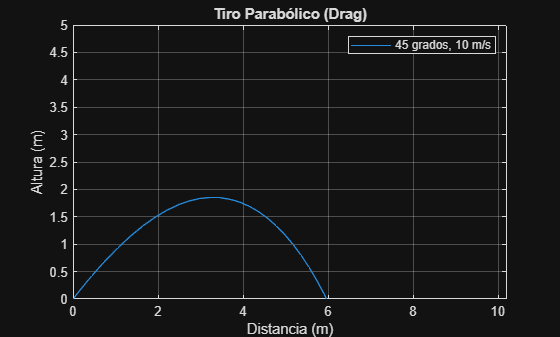

In [17]:

     % --- DEFINICIÓN DE LA FUNCIÓN--
     % Vector Estado Inicial: [x; vx; y; vy]
     state_vector_0 = [x_0; y_0; v_0; theta_0];

     f = @(t,y) derive(t,y,m,k,g);
     [t,Y] = ode45(f, t_span, state_vector_0);

     figure(7);
     plot(Y(:,1),Y(:,2))
     xlim([0 10.2]);
     ylim([0 5]);
     grid on;
     title('Tiro Parabólico (Drag)');
     legend('45 grados, 10 m/s');
     xlabel('Distancia (m)');
     ylabel('Altura (m)');

In [18]:

function derivative_vector_estado = derive(~, z, m, k, g)
    % Estado
    x  = z(1);
    y  = z(2);
    v  = z(3);
    angle = z(4);

    % Dinámica
    dx  = v*cos(angle);
    dy  = v*sin(angle);
    dv  = - (k/m)*v^2 - g*sin(angle);

    % Evitar división por cero cuando la velocidad tiende a ese valor
    if v < 1e-8
        d_angle = 0;
    else
        d_angle = - (g/v)*cos(angle);
    end

    derivative_vector_estado = [dx; dy; dv; d_angle];
end

# <span style="color:rgb(213,80,0)">**Mecánica de Vuelo**</span>

Ahora, la implementación de las ecuaciones vistas anteriormente a la mecánica de vuelo debería no ser muy diferente al caso de tiro parabólico con drag.


Nuestro vector de estado $v$ viene dado por las siguientes ecuaciones (vistas en clase):


$$\begin{array}{l} \overset{\cdot }{x} =v\;\cos \;\left(\gamma \right)\newline \overset{\cdot }{y} =v\;\sin \;\left(\gamma \right)\newline \overset{\cdot }{v} =g\left\lbrack \frac{\left(T-D\right)}{W}-\sin \left(\gamma \right)\right\rbrack \newline \overset{\cdot }{\gamma \;} =-\frac{g}{v}\;\left(\cos \;\left(\gamma \right)+\frac{L}{W}\right) \end{array}$$


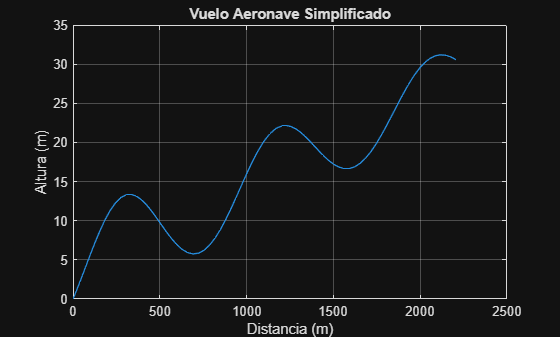

In [19]:
    clear;clc; clear all;
     h=0.1; %tamaño del paso
     % --- PARÁMETROS FÍSICOS ---
     m=1000;
     g=9.81;
     k=0.25; %Término del coefficiente de drag
     l=5; %Término del coefficiente de lift
     % Define time vector and angle

     t_span = [0 50];

     %Condiciones inciales
     v_0 = 45; %velocidad inicial
     theta_0 = deg2rad(3); %ángulo inicial
     x_0 = 0; %posición inicial
     y_0 = 0;

     x_dot = v_0 * cos (theta_0);
     y_dot = v_0 * sin (theta_0);

      % --- DEFINICIÓN DE LA FUNCIÓN--
     % Vector Estado Inicial: [x; vx; y; vy]
     state_vector_0 = [x_0; y_0; v_0; theta_0];

     f = @(t,y) derive_airplane(t,y,m,k,l,g);
     [t,Y] = ode45(f, t_span, state_vector_0);

     figure(8);
     plot(Y(:,1),Y(:,2))
     grid on;
     title('Vuelo Aeronave Simplificado');
     xlabel('Distancia (m)');
     ylabel('Altura (m)');


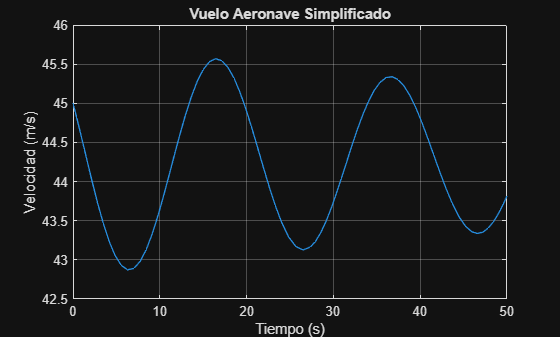

In [20]:

     figure(9);
     plot(t,Y(:,3))
     grid on;
     title('Vuelo Aeronave Simplificado');
     xlabel('Tiempo (s)');
     ylabel('Velocidad (m/s)');


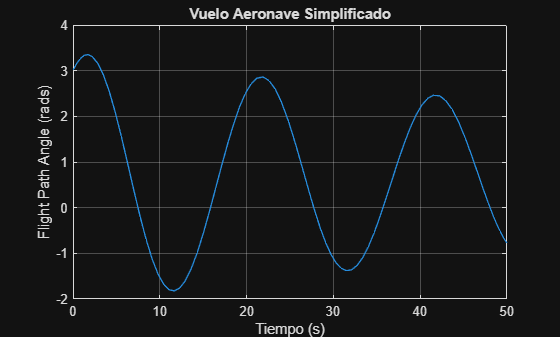

In [21]:

     figure(10);
     plot(t,rad2deg(Y(:,4)))
     grid on;
     title('Vuelo Aeronave Simplificado');
     xlabel('Tiempo (s)');
     ylabel('Flight Path Angle (rads)');

In [22]:

     function derivative_vector_estado = derive_airplane(~, z, m, k, l, g)
    % Estado
    x  = z(1);
    y  = z(2);
    v  = z(3);
    angle = z(4);
    % Calculate lift force
    L = l * v^2; % Assuming a simple lift model
    D = k * v^2;
    T = 600; %Empuje (Newtons)
    W = m * g; % Weight of the object

    % Dinámica
    dx  = v*cos(angle);
    dy  = v*sin(angle);
    dv  = g*((T-D)/W-sin(angle));

    % Evitar división por cero cuando la velocidad tiende a ese valor
    if v < 1e-8
        d_angle = 0;
    else
        d_angle = (g/v)*(-cos(angle)+L/W);
    end

    derivative_vector_estado = [dx; dy; dv; d_angle];
end